In [1]:
# Import the packages
import tensorflow as tf
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
# Define the tokenizer
tokenizer = Tokenizer()
# Data
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
# Transform data in a corpus
corpus = data.lower().split("\n")
# Fit the tokenizer on the corpus of sentences
tokenizer.fit_on_texts(corpus)
# Get the total amount of words
total_words = len(tokenizer.word_index) + 1

print('tokenizer.word_index:', tokenizer.word_index)
print('total_words:', total_words)

tokenizer.word_index: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81

In [5]:
# Print the corpus of sentences
for line in corpus:
    print(line)

in the town of athy one jeremy lanigan 
 battered away til he hadnt a pound. 
his father died and made him a man again 
 left him a farm and ten acres of ground. 
he gave a grand party for friends and relations 
who didnt forget him when come to the wall, 
and if youll but listen ill make your eyes glisten 
of the rows and the ructions of lanigans ball. 
myself to be sure got free invitation, 
for all the nice girls and boys i might ask, 
and just in a minute both friends and relations 
were dancing round merry as bees round a cask. 
judy odaly, that nice little milliner, 
she tipped me a wink for to give her a call, 
and i soon arrived with peggy mcgilligan 
just in time for lanigans ball. 
there were lashings of punch and wine for the ladies, 
potatoes and cakes; there was bacon and tea, 
there were the nolans, dolans, ogradys 
courting the girls and dancing away. 
songs they went round as plenty as water, 
the harp that once sounded in taras old hall,
sweet nelly gray and the rat ca

In [9]:
# Generate the input sequences for the text generating model
input_sequences = []
# For each line in the corpus
for line in corpus:
    # Transform the sentence in sequence of indices
    token_list = tokenizer.texts_to_sequences([line])[0] 
    # For every token
    for i in range(1, len(token_list)):
        # Get the n_gram_sequence that is the sentence from the beginning to the token
        # Add the next token
        n_gram_sequence = token_list[:i + 1]
        # Add all the n_gram_sequences in the list input_sequences
        input_sequences.append(n_gram_sequence)

In [13]:
# Pad the sequences sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print('max_sequence_len :', max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

max_sequence_len : 11


In [11]:
# Print the input_sequences
input_sequences

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]], dtype=int32)

In [14]:
# Create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
# xs is the padded sequence
# ys is the the next word after the sentence. It is one-hot encoded
xs[6], ys[6]

(array([ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69], dtype=int32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [20]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [21]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [22]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [25]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Train
history = model.fit(xs, ys, epochs=500, verbose=1)

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 6s 12ms/sample - loss: 5.5681 - accuracy: 0.0265
Epoch 2/500
453/453 [==============================] - 0s 951us/sample - loss: 5.5438 - accuracy: 0.0486
Epoch 3/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.4894 - accuracy: 0.0486
Epoch 4/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.3354 - accuracy: 0.0486
Epoch 5/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.1477 - accuracy: 0.0486
Epoch 6/500
453/453 [==============================] - 0s 972us/sample - loss: 5.0713 - accuracy: 0.0486
Epoch 7/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.0296 - accuracy: 0.0486
Epoch 8/500
453/453 [==============================] - 0s 1ms/sample - loss: 4.9981 - accuracy: 0.0508
Epoch 9/500
453/453 [==============================] - 0s 1ms/sample - loss: 4.9691 - accuracy: 0.0574
Epoch 10/500
453/453 [=========================

453/453 [==============================] - 0s 988us/sample - loss: 2.3267 - accuracy: 0.5629
Epoch 80/500
453/453 [==============================] - 0s 992us/sample - loss: 2.3047 - accuracy: 0.5629
Epoch 81/500
453/453 [==============================] - 0s 990us/sample - loss: 2.2817 - accuracy: 0.5850
Epoch 82/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.2494 - accuracy: 0.5784
Epoch 83/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.2293 - accuracy: 0.5938
Epoch 84/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.2003 - accuracy: 0.5982
Epoch 85/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.1701 - accuracy: 0.6026
Epoch 86/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.1484 - accuracy: 0.6026
Epoch 87/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.1197 - accuracy: 0.6093
Epoch 88/500
453/453 [==============================] - 1s 1ms/sample -

453/453 [==============================] - 0s 971us/sample - loss: 0.9774 - accuracy: 0.8631
Epoch 157/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.9668 - accuracy: 0.8653
Epoch 158/500
453/453 [==============================] - 0s 899us/sample - loss: 0.9555 - accuracy: 0.8631
Epoch 159/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.9445 - accuracy: 0.8675
Epoch 160/500
453/453 [==============================] - 0s 958us/sample - loss: 0.9383 - accuracy: 0.8720
Epoch 161/500
453/453 [==============================] - 0s 936us/sample - loss: 0.9321 - accuracy: 0.8786
Epoch 162/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.9214 - accuracy: 0.8808
Epoch 163/500
453/453 [==============================] - 0s 939us/sample - loss: 0.9146 - accuracy: 0.8764
Epoch 164/500
453/453 [==============================] - 0s 931us/sample - loss: 0.9057 - accuracy: 0.8742
Epoch 165/500
453/453 [==============================] - 

453/453 [==============================] - 0s 1ms/sample - loss: 0.4561 - accuracy: 0.9404
Epoch 234/500
453/453 [==============================] - 0s 969us/sample - loss: 0.4541 - accuracy: 0.9404
Epoch 235/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.4520 - accuracy: 0.9404
Epoch 236/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.4435 - accuracy: 0.9426
Epoch 237/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4396 - accuracy: 0.9404
Epoch 238/500
453/453 [==============================] - 0s 954us/sample - loss: 0.4361 - accuracy: 0.9404
Epoch 239/500
453/453 [==============================] - 0s 989us/sample - loss: 0.4306 - accuracy: 0.9426
Epoch 240/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4257 - accuracy: 0.9448
Epoch 241/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.4226 - accuracy: 0.9448
Epoch 242/500
453/453 [==============================] - 1s 1ms

453/453 [==============================] - 0s 971us/sample - loss: 0.2552 - accuracy: 0.9514
Epoch 311/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2542 - accuracy: 0.9514
Epoch 312/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2547 - accuracy: 0.9448
Epoch 313/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2537 - accuracy: 0.9470
Epoch 314/500
453/453 [==============================] - 0s 982us/sample - loss: 0.2521 - accuracy: 0.9448
Epoch 315/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2485 - accuracy: 0.9514
Epoch 316/500
453/453 [==============================] - 0s 956us/sample - loss: 0.2797 - accuracy: 0.9404
Epoch 317/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.2693 - accuracy: 0.9404
Epoch 318/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.2760 - accuracy: 0.9448
Epoch 319/500
453/453 [==============================] - 0s 1ms

453/453 [==============================] - 0s 933us/sample - loss: 0.1749 - accuracy: 0.9470
Epoch 388/500
453/453 [==============================] - 0s 940us/sample - loss: 0.1737 - accuracy: 0.9514
Epoch 389/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1729 - accuracy: 0.9492
Epoch 390/500
453/453 [==============================] - 0s 980us/sample - loss: 0.1718 - accuracy: 0.9536
Epoch 391/500
453/453 [==============================] - 0s 855us/sample - loss: 0.1707 - accuracy: 0.9514
Epoch 392/500
453/453 [==============================] - 0s 992us/sample - loss: 0.1704 - accuracy: 0.9492
Epoch 393/500
453/453 [==============================] - 0s 979us/sample - loss: 0.1691 - accuracy: 0.9492
Epoch 394/500
453/453 [==============================] - 0s 993us/sample - loss: 0.1704 - accuracy: 0.9492
Epoch 395/500
453/453 [==============================] - 0s 969us/sample - loss: 0.1694 - accuracy: 0.9514
Epoch 396/500
453/453 [==============================

453/453 [==============================] - 0s 1ms/sample - loss: 0.1362 - accuracy: 0.9470
Epoch 465/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1354 - accuracy: 0.9470
Epoch 466/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1357 - accuracy: 0.9470
Epoch 467/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1437 - accuracy: 0.9536
Epoch 468/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1386 - accuracy: 0.9492
Epoch 469/500
453/453 [==============================] - 0s 944us/sample - loss: 0.1367 - accuracy: 0.9492
Epoch 470/500
453/453 [==============================] - 1s 1ms/sample - loss: 0.1384 - accuracy: 0.9536
Epoch 471/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1366 - accuracy: 0.9470
Epoch 472/500
453/453 [==============================] - 0s 1ms/sample - loss: 0.1342 - accuracy: 0.9514
Epoch 473/500
453/453 [==============================] - 0s 1ms/sam

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

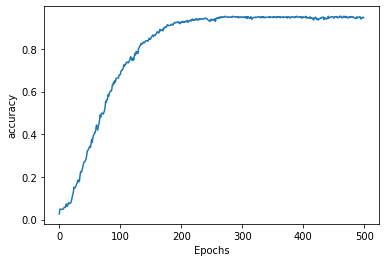

In [28]:
plot_graphs(history, 'accuracy')

In [29]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin the nice lanigans ball lanigan eyes fall dublin a call hall glisten might ask glisten glisten glisten a call hall then relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations relations
